Imprimir total dos animais em análise
200
Imprimir training data
[[array([[150, 151, 154, ...,  69,  64,  78],
       [146, 147, 144, ...,  65,  65,  81],
       [136, 131, 150, ...,  62,  66,  85],
       ..., 
       [ 54,  46,  45, ...,  80,  90, 121],
       [ 52,  46,  48, ...,  95, 115, 150],
       [ 59,  50,  48, ..., 112, 142, 175]], dtype=uint8), 0], [array([[ 27,  28,  31, ..., 250, 254, 254],
       [ 28,  30,  35, ..., 235, 254, 255],
       [ 29,  32,  37, ..., 197, 255, 250],
       ..., 
       [149, 160, 118, ..., 155, 252, 250],
       [ 68,  26, 169, ..., 254, 253, 255],
       [145, 175, 140, ..., 252, 252, 252]], dtype=uint8), 1], [array([[248, 248, 248, ..., 250, 246, 243],
       [248, 248, 248, ..., 250, 248, 245],
       [248, 248, 248, ..., 251, 251, 247],
       ..., 
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), 1], [array([[131, 133, 135, ...,  27,  20,  14]

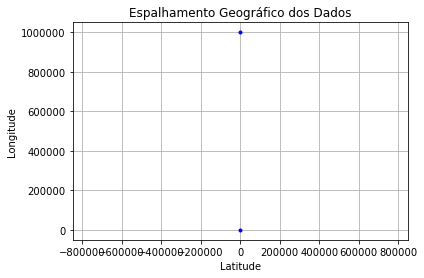

............converte >> 3D..............
(100, 100, 100, 1)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import cv2
import os 
import sklearn
import random
from sklearn import datasets
from random import shuffle
from mpl_toolkits.mplot3d import Axes3D

pathdirectory="C:/animals10"

animals=["Esquilo","Galinha"]

img_size=100
training_data=[]

def create_training_data():
	for category in animals:  #vai ver a categoria no array animals
		path=os.path.join(pathdirectory,category) #vai juntar o pathdirectory e o animals[] (animals10/Esquilo)
		class_num=animals.index(category)   #Animal type index identification. Identifica o indice de cada categoria, esquilo = [0], galinha =[1]
		for img in os.listdir(path)[:100]:  #limite 100. lista tudo o que está dentro do path(esquilo e galinha, 100 de cada)
			try:
				img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)  #lê o caminho e as imagens e vai colocar todas imagens a cinzento no img_array
				new_array=cv2.resize(img_array,(img_size,img_size)) #Redimensiona as imagens para 100 (img_size)
				training_data.append([new_array,class_num]) #junta as imagens redimensionadas com o indice respectivo
				random.shuffle(training_data) #Aleatório de esquilo e galinha
			except Exception as e:
				pass	

create_training_data()
print("Imprimir total dos animais em análise")
print(len(training_data))
print("Imprimir training data")
print(training_data)



X=[]
y=[]

for features,label in training_data[:100]:#limite 100
    X.append(features)
    y.append(label)
#normalizar    
X=np.array(X).reshape(-1,img_size,img_size,1) # -1= n features; 1=grayscale; converte a lista num array numpy
#o y pode ser uma lista logo não precisa de ser convertido

print("Imprime X features  do training data")
print(X)
print("Imprime y labels do training data")
print(y)

print("")
print("Média de X do universo em estudo")
print(X.mean(axis=0))
print("")

v=(sum(X)/X.shape[0]-X)**2
print("Variância de X")
print((sum(v)/X.shape[0])[0])

#Variância agregada
X1_tmp=X.reshape(-1,img_size,img_size,1)
X1=X1_tmp.mean(axis=0)
v=(sum(X1)/X1.shape[0]-X1)**2
print("Variância de X1 agregada")
print(sum(v)/X1.shape[0])
#o resultado de um dataset agregado reduz a variância comparado com o dataset inicial

print("............features de cada instância..............")
#mostra as features de cada instância
print(X.shape[0:])
print(X.shape[1:])
print(X.shape[2:])
print("............converte >> 2D..............")
X_2D=X.reshape(-1,1).shape#transforma o array em 2D
print(X.reshape(-1,1).shape)#2 args
plt.figure()
plt.title("Espalhamento Geográfico dos Dados")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.grid()
plt.axis('equal')
plt.plot(X_2D,'.', color="b")
plt.show()

print("............converte >> 3D..............")
X_3D=X.shape#transforma o array em 3D
print(X.shape)#4 args
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3D[0], X_3D[1], X_3D[2],'z',s=30, c="black")

